### Author : Mistry Unnat


## <center>Adult Data Set</center>
### URL: http://archive.ics.uci.edu/ml/datasets/Adult
### Abstract: 
Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.



## <center>Loading and ploting the Dataset</center>

### Load libraries

In [1]:
# Load EDA libraries
import pandas as pd
import numpy as np

# Load data visualization libraries
import seaborn as sns
from matplotlib import pyplot as plt

### Load ML libraries

In [2]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### Load dataset

In [3]:
# Load Dataset from url
col_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
             'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

# Get dataset from url
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
# data_url = 'adult.data'
# test_data_url = 'adult.test'

data = pd.DataFrame(pd.read_csv(data_url,names= col_names))
test_data = pd.DataFrame(pd.read_csv(test_data_url,names = col_names)[1:])
categorical_col_names = data.select_dtypes('object').keys()

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Dataset info

In [4]:
print(data.info())
print(f"\n\nNull values in train dataset : {np.sum(np.sum(data.isna()))}")
print(f"Null values in test dataset  : {np.sum(np.sum(test_data.isna()))}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


Null values in train dataset : 0
Null values in test dataset  : 0


### Plot dataset features

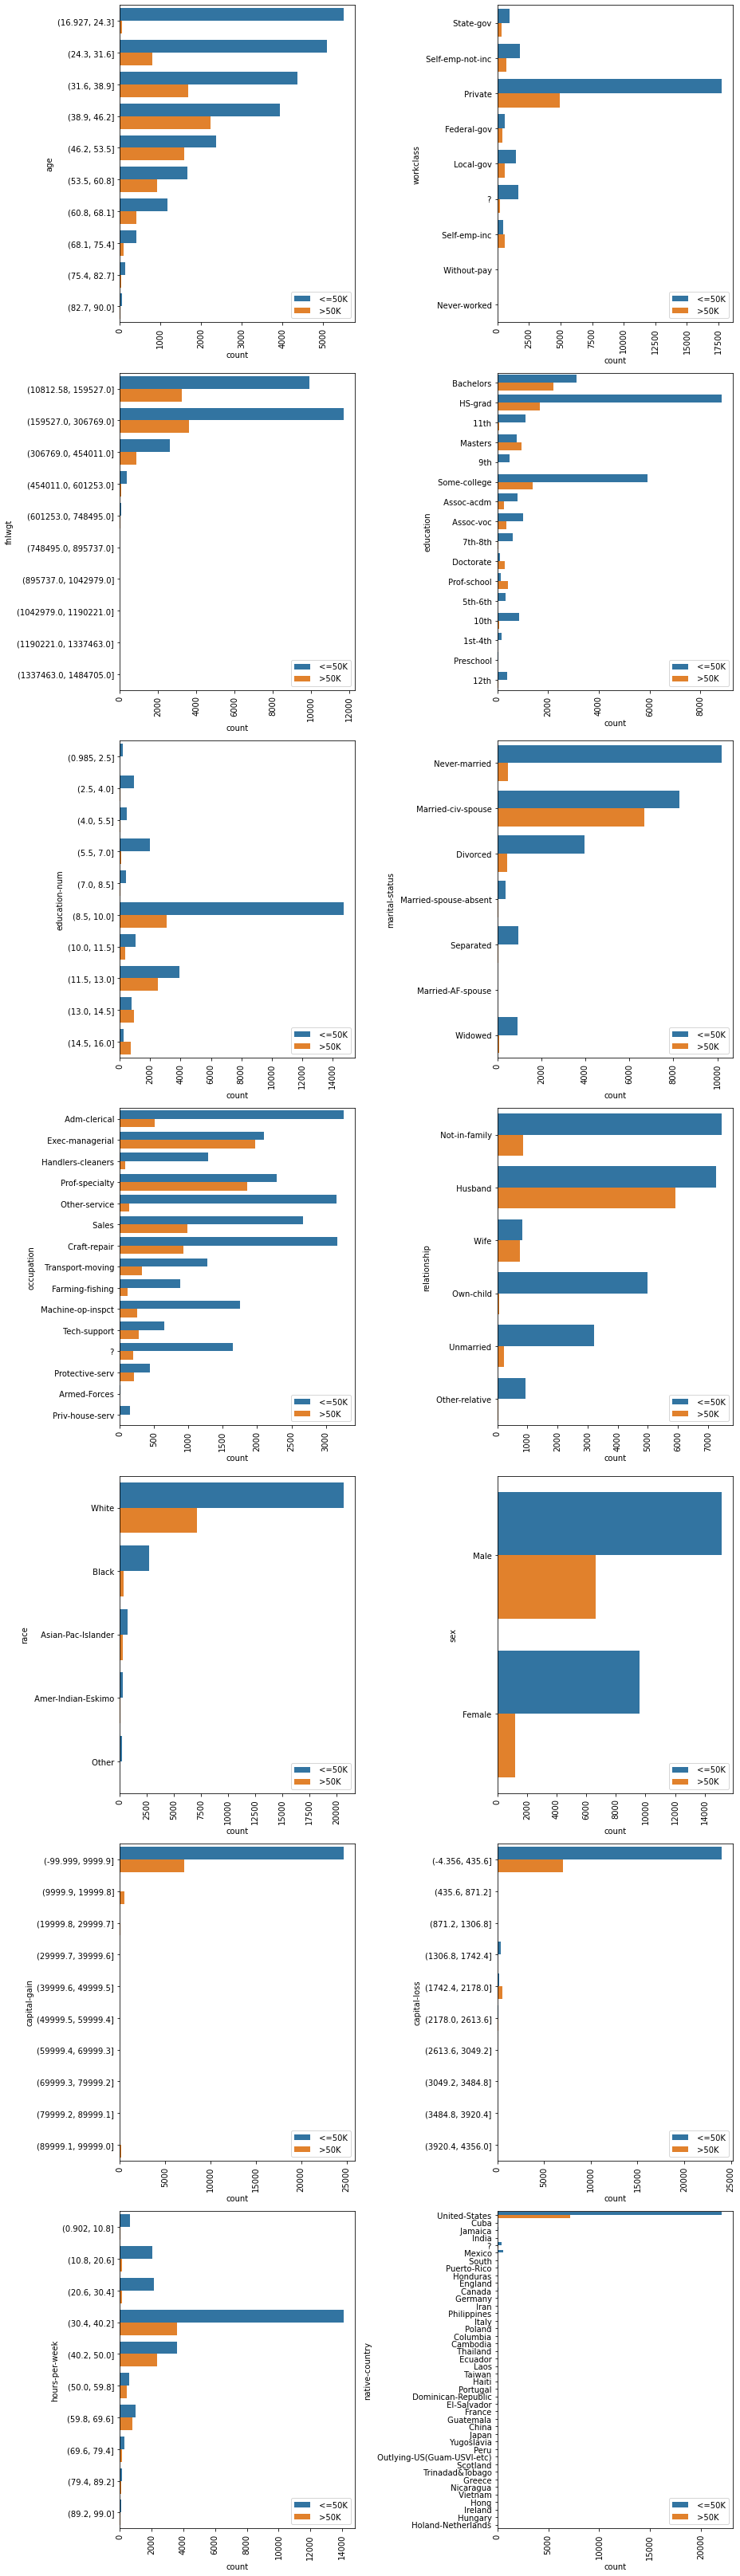

In [5]:
# Plot countplot for each columns
i=1
plt.rcParams["figure.figsize"] = (13,45)

for col in col_names:
    if col!='income':   
        plt.subplot(7,2,i)
        if col in categorical_col_names:
            sns.countplot(y=data[col],hue= data.income)
        else:
            temp = pd.cut(data[col].copy(),10)
            sns.countplot(y = temp,hue=data.income)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.legend(loc="lower right")
        i+=1   
plt.show()

### Display heatmap

Text(0.5, 1.0, 'Correlation matrix')

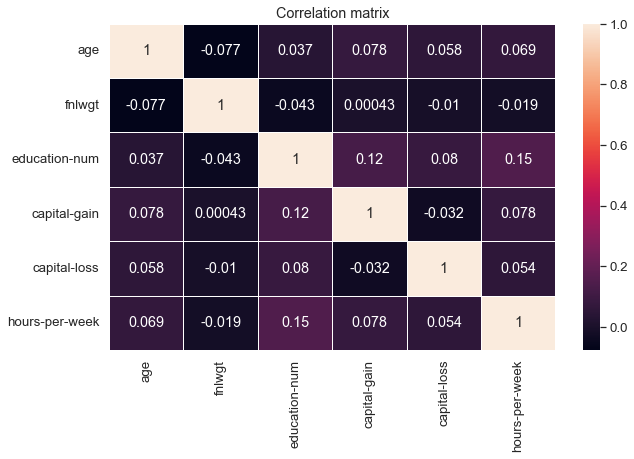

In [6]:
#Displaying heat map
plt.figure(figsize = (10,6))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(),annot=True,linewidth=0.5)
plt.title('Correlation matrix')

## <center>Encoding and spliting data into train and test set</center>

### Ordinal Encoding

In [7]:
# As we have categorical non-numerical data, encode the data in numerical form using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
for col in categorical_col_names:
    OneHotEncoder =OrdinalEncoder()
    data[col] = OneHotEncoder.fit_transform(np.array(data[col]).reshape(-1,1))
    test_data[col] = OneHotEncoder.fit_transform(np.array(test_data[col]).reshape(-1,1))

### Copy and split data in train and test variables

In [8]:
X_train =  data.copy().drop('income',axis=1)
y_train = data.income.copy()
X_test = test_data.copy().drop('income',axis=1)
y_test = test_data.income.copy()


### Feature Importance

[0.15541409 0.04462728 0.16471799 0.0389815  0.0848051  0.07314082
 0.07559655 0.09170353 0.01448852 0.02969941 0.08610242 0.0280286
 0.09490292 0.01779126]


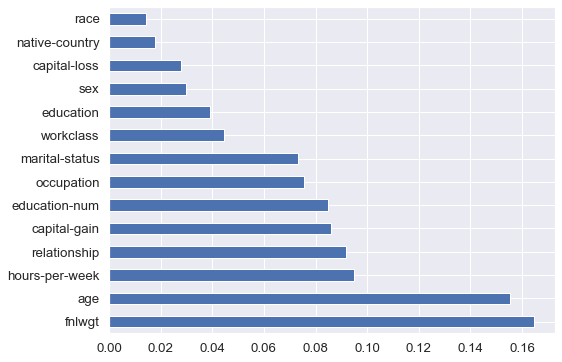

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
plt.figure(figsize = (8,6))
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(100).plot(kind='barh')

plt.show()

### Function to display learning curve

In [10]:
from sklearn.model_selection import learning_curve
def learningCurve(clf):
    lc = learning_curve(clf,X_train,y_train,cv=10,n_jobs=-1)
    size = lc[0]
    train_score = [lc[1][i].mean() for i in range(0,5)]
    test_score = [lc[2][i].mean() for i in range(0,5)]
    fig = plt.figure(figsize = (12,8))
    plt.plot(size,train_score,label = "Train Score")
    plt.plot(size, test_score, label = "Test Score")
    plt.xlabel("Size")
    plt.ylabel("Score")
    plt.legend()

### Function to display classification report

In [11]:
def clf_report(y_test,pred):
    precision, recall, fscore, support = precision_recall_fscore_support(y_true=y_test,y_pred= pred)
    print(f"Precision : {precision}")
    print(f"Recall : {recall}")
    print(f"Fscore : {fscore}")
    print(f"Support : {support}")
    print(f"\nConfusion matrix : \n{confusion_matrix(y_true=y_test,y_pred= pred)}")

# <center>Logistic Regression</center>

In [12]:
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train,y_train)
pred_logReg = logreg_clf.predict(X_test)
print(f"Accuracy : {logreg_clf.score(X_test,y_test)}")
clf_report(y_test,pred_logReg)

Accuracy : 0.7900620355015048
Precision : [0.81168337 0.61784141]
Recall : [0.94418979 0.29173167]
Fscore : [0.8729368  0.39632639]
Support : [12435  3846]

Confusion matrix : 
[[11741   694]
 [ 2724  1122]]


c:\users\unnat\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Learning curve for Logistic Regression

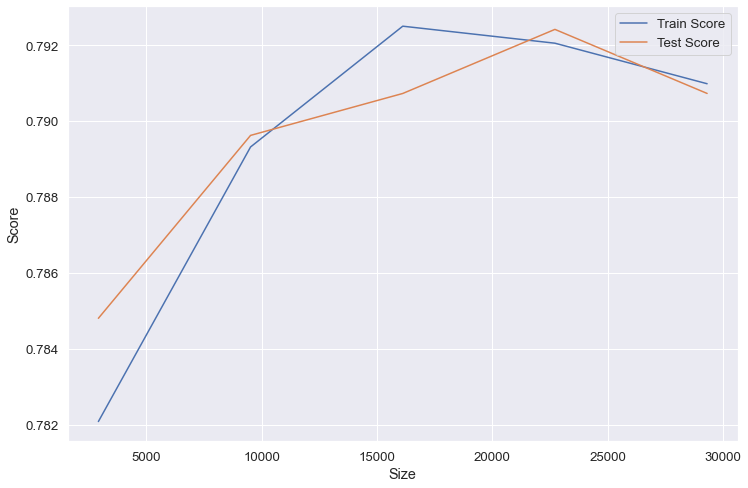

In [13]:
learningCurve(logreg_clf)

## <center>KNN Classification</center>

In [14]:
from sklearn.neighbors import KNeighborsClassifier

#Peforming grid search for hyper parameter tuning
params = [{"weights": ["uniform", "distance"],'p':[1,2]}]
           
knn_clf = GridSearchCV(estimator = KNeighborsClassifier(),
                             param_grid=params)

# knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train,y_train)
pred = knn_clf.predict(X_test)
print(f"Best parameters : {knn_clf.best_params_}")
print(f"Best estimator : {knn_clf.best_estimator_}")
print("\nAccuracy : ",knn_clf.score(X_test,y_test))
clf_report(y_test,pred)

Best parameters : {'p': 1, 'weights': 'uniform'}
Best estimator : KNeighborsClassifier(p=1)

Accuracy :  0.7812173699404213
Precision : [0.81773258 0.56125971]
Recall : [0.91821472 0.33827353]
Fscore : [0.86506554 0.42212849]
Support : [12435  3846]

Confusion matrix : 
[[11418  1017]
 [ 2545  1301]]


### Learning Curve for KNN Classification

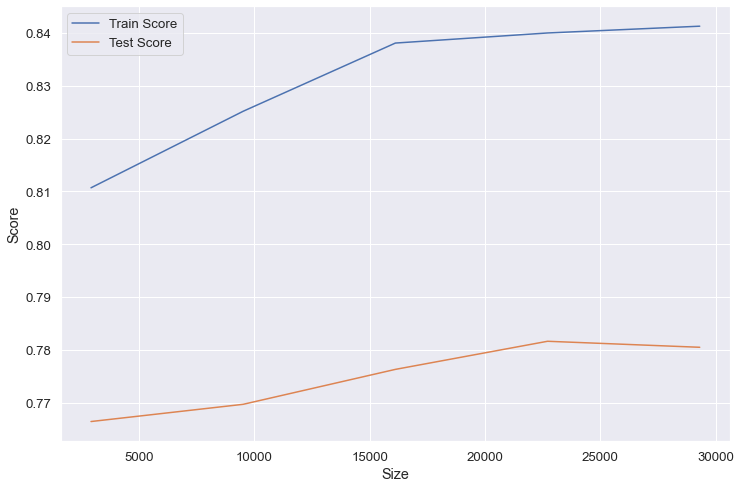

In [15]:
learningCurve(knn_clf)

## <center>Decision Tree Classifier</center>

In [16]:
from sklearn.tree import DecisionTreeClassifier

#Peforming grid search for hyper parameter tuning
params = [{"criterion": ["gini", "entropy"],'max_depth':[None,1,2]}]         
dt_clf = GridSearchCV(estimator = DecisionTreeClassifier(),
                             param_grid=params)
dt_clf.fit(X_train,y_train)
print(f"Best parameters : {dt_clf. best_params_}")
print(f"Best estimator : {dt_clf.best_estimator_}")
pred_dt = dt_clf.predict(X_test)
print("\nAccuracy : ",dt_clf.score(X_test,y_test))
clf_report(y_test,pred_dt)

Best parameters : {'criterion': 'gini', 'max_depth': 2}
Best estimator : DecisionTreeClassifier(max_depth=2)

Accuracy :  0.8267919660954487
Precision : [0.84011319 0.73904939]
Recall : [0.95496582 0.4123765 ]
Fscore : [0.89386526 0.5293725 ]
Support : [12435  3846]

Confusion matrix : 
[[11875   560]
 [ 2260  1586]]


### Learning Curve for Decision Tree Classifier

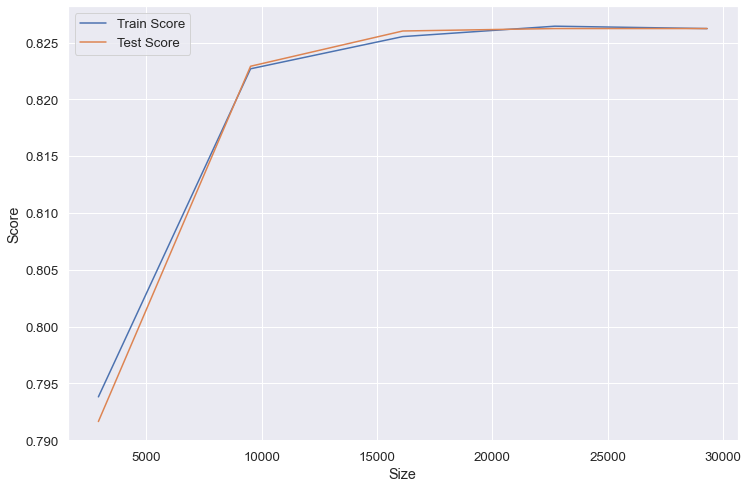

In [17]:
learningCurve(dt_clf)

### Plot Decision Tree

[Text(279.0, 362.4, 'X[7] <= 0.5\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(139.5, 217.44, 'X[4] <= 12.5\ngini = 0.495\nsamples = 13193\nvalue = [7275, 5918]'),
 Text(69.75, 72.47999999999996, 'gini = 0.442\nsamples = 9224\nvalue = [6178, 3046]'),
 Text(209.25, 72.47999999999996, 'gini = 0.4\nsamples = 3969\nvalue = [1097, 2872]'),
 Text(418.5, 217.44, 'X[10] <= 7073.5\ngini = 0.179\nsamples = 19368\nvalue = [17445, 1923]'),
 Text(348.75, 72.47999999999996, 'gini = 0.146\nsamples = 18932\nvalue = [17431, 1501]'),
 Text(488.25, 72.47999999999996, 'gini = 0.062\nsamples = 436\nvalue = [14, 422]')]

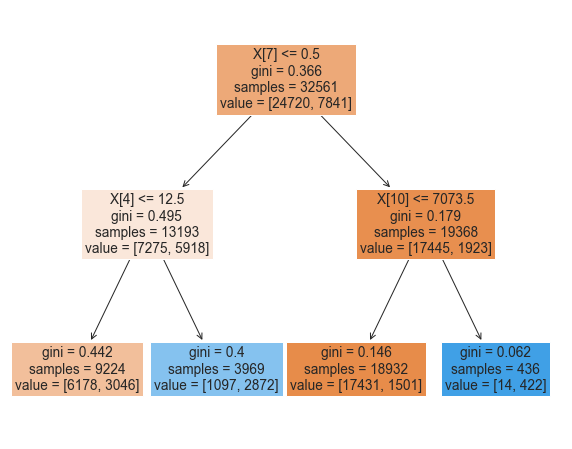

In [24]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=2)
dt.fit(X_train,y_train)
plt.figure(figsize = (10,8))
from sklearn.tree import plot_tree
plot_tree(dt,filled=True)

## <center>Random Forest Classifier</center>

In [19]:
from sklearn.ensemble import RandomForestClassifier

#Peforming grid search for hyper parameter tuning
params={'criterion': ["gini", "entropy"],'n_estimators': [10,50,100],'max_features': ["auto", "sqrt", "log2"]}
rf_clf=GridSearchCV(RandomForestClassifier(), params)
rf_clf.fit(X_train, y_train)
print(f"Best parameters : {rf_clf. best_params_}")
print(f"Best estimator : {rf_clf.best_estimator_}")
pred_rf = rf_clf.predict(X_test)
print("\nAccuracy : ",rf_clf.score(X_test,y_test))
clf_report(y_test,pred_rf)


Best parameters : {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}
Best estimator : RandomForestClassifier()

Accuracy :  0.8559670781893004
Precision : [0.88529097 0.73548792]
Recall : [0.93220748 0.60946438]
Fscore : [0.90814368 0.66657188]
Support : [12435  3846]

Confusion matrix : 
[[11592   843]
 [ 1502  2344]]


### Learning Curve for Random Forest Classifier

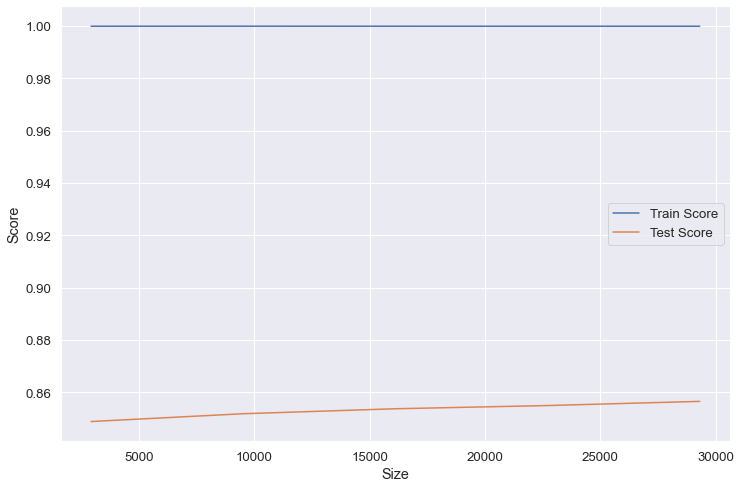

In [25]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
learningCurve(rf_clf)

### Summary